In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset limpio
df = pd.read_csv("../data/cleaned_social_media_data.csv")

In [3]:
# Configurar estilo de gráficos
sns.set_style("whitegrid")

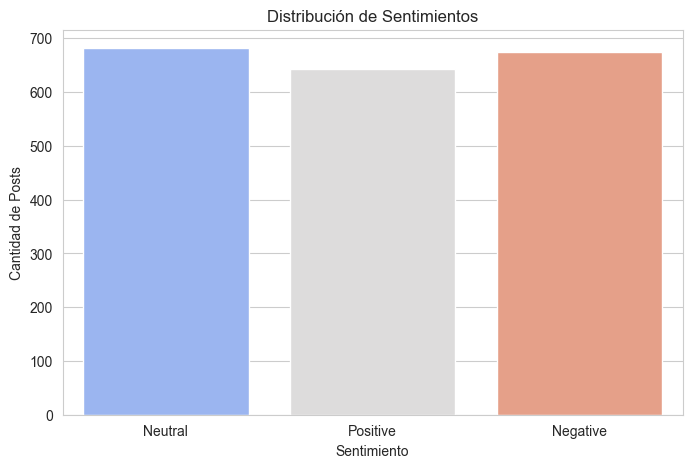

In [ ]:
# Gráfico de barras de la distribución de sentimientos
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Sentiment Label"], palette="coolwarm")
plt.title("Distribución de Sentimientos")
plt.xlabel("Sentimiento")
plt.ylabel("Cantidad de Posts")
plt.savefig("../graphics/sentiment_distribution.png")
plt.show()

# Análisis de Sentimientos

La cantidad de publicaciones con sentimiento neutral, positivo y negativo está relativamente equilibrada.

Esto indica que el contenido publicado genera una respuesta mixta en la audiencia.

No hay predominancia fuerte de uno de los tipos de sentimmiento, por lo que podría serr que la temática de las publicaciones sea variada o que la audiencia responde de forma equilibrada a diferentes tipos de contenido.

<Figure size 1000x600 with 0 Axes>

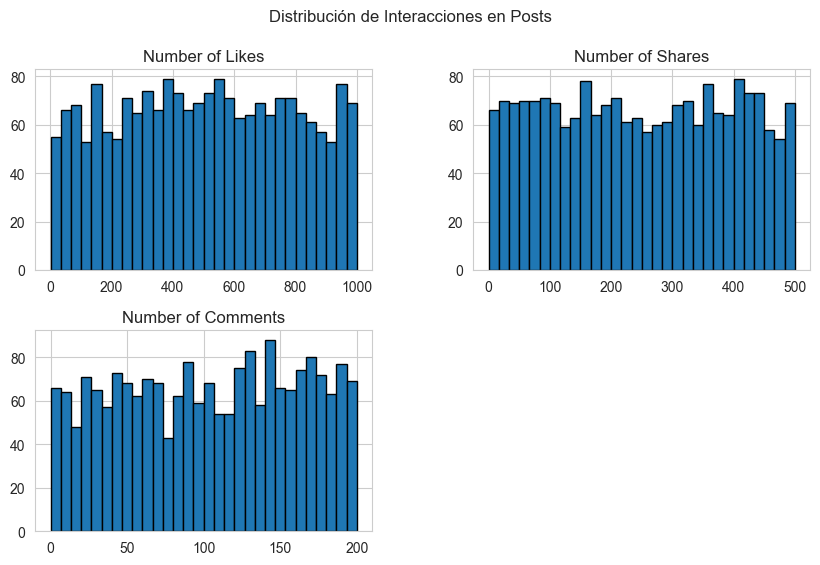

In [ ]:
# Histograma de interacciones (likes, shares, comments)
plt.figure(figsize=(10, 6))
df[["Number of Likes", "Number of Shares", "Number of Comments"]].hist(bins=30, figsize=(10, 6), edgecolor='black')
plt.suptitle("Distribución de Interacciones en Posts")
plt.savefig("../graphics/interactions_histogram.png")
plt.show()

# Distribuciones de Interacciones: likes, shares y comentarios

Los histogramas muestran una distribución bastante uniforme en la cantidad de likes, shares y comentarios.

No se observa una concentración en valores específicos, lo que sugiere que las publicaciones reciben interacciones de manera dispersa y no hay un claro patrón dominante.

Esto podría indicar que la audiencia interactúa de manera variada, sin una tendencia específica en engagement.

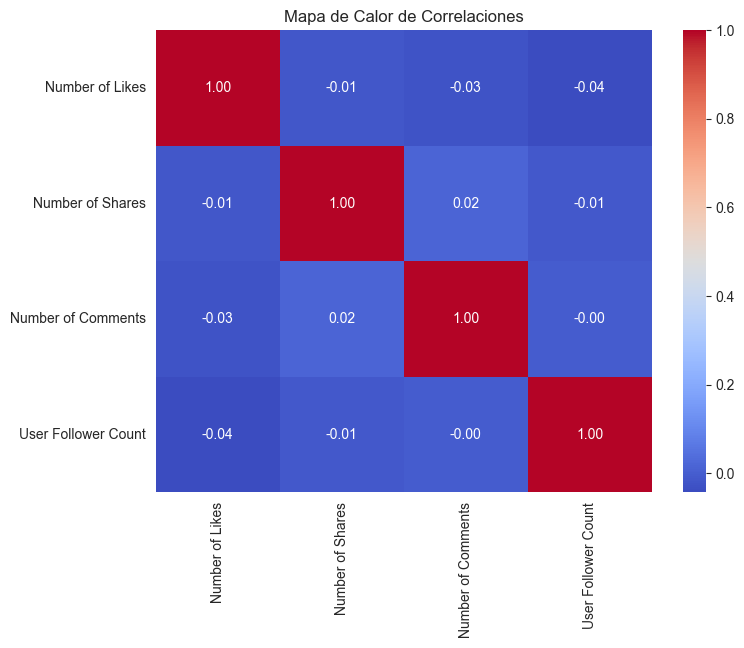

In [5]:
# Mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.savefig("../graphics/correlation_heatmap.png")
plt.show()

# Correlaciones entre métricas de interacción

La matriz de correlación muestra que no hay relaciones fuertes entre las métricas de interacción (likes, shares, comentarios y cantidad de seguidores).

Las correlaciones están cerca de 0, lo que indica que estos factores no están directamente relacionados entre sí.

Esto sugiere que el engagement en las publicaciones no está influenciado de manera significativa por una sola métrica, sino por múltiples factores externos.

# Engagements por categoría de sentimiento

Se podría explorar otras variables para entender mejor qué factores inlfuyen en el engagement. 

Por ejemplo, analizar por categorías temáticas podría ayudar a identificar los tipos de contenido que genera respuestas más positivas o negativas.

Se procede a realizar un analisis de cómo el sentimiento del post afecta al engagement.

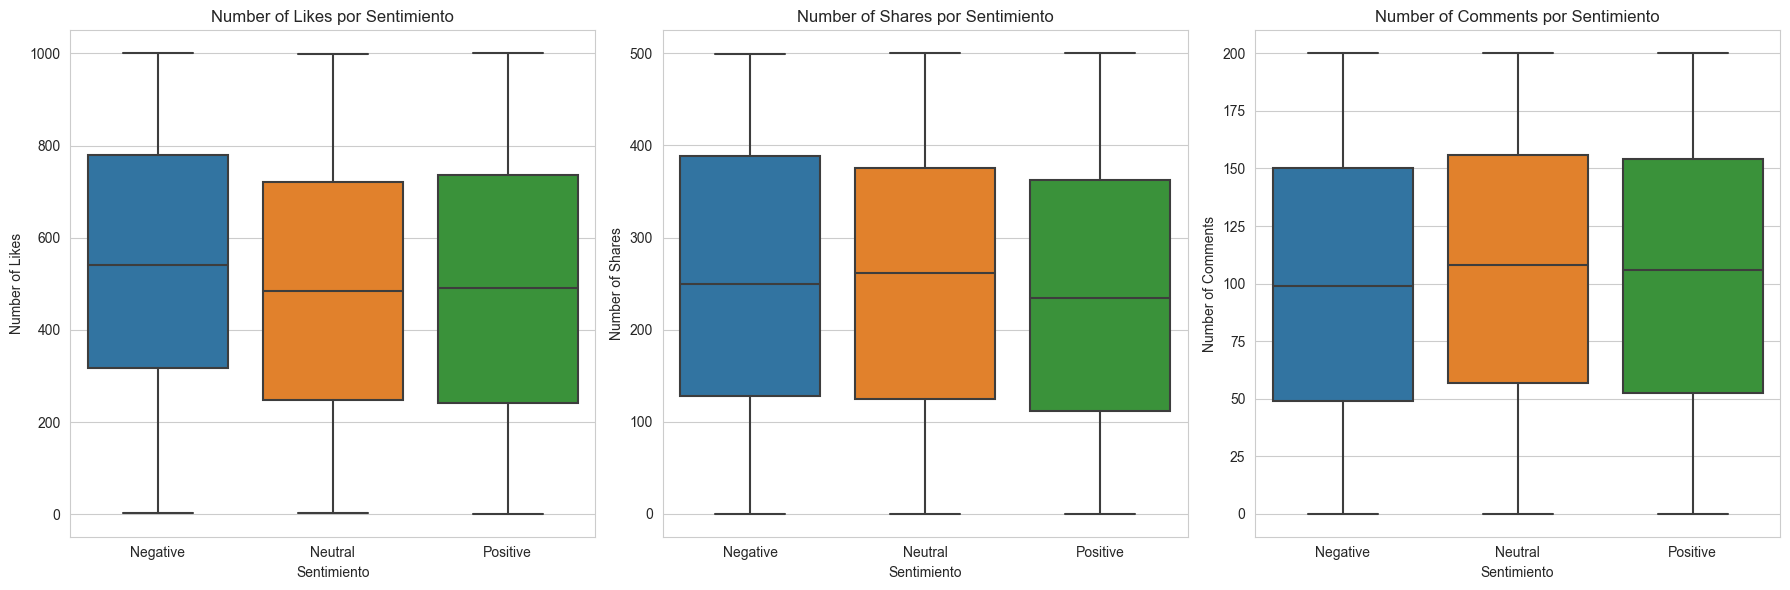

In [4]:
df["Sentiment Label"] = df["Sentiment Label"].astype("category")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

metrics = ["Number of Likes", "Number of Shares", "Number of Comments"]
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x="Sentiment Label", y=metric, ax=axes[i])
    axes[i].set_title(f"{metric} por Sentimiento")
    axes[i].set_xlabel("Sentimiento")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.savefig("../graphics/likes_shares_comments.png")
plt.show()

En la primera gráfica se pueden ver las diferencias en cuanto a número de likes de cada tipo de sentimiento. El tipo de sentimiento que contabiliza mayor número de likes es el sentimiento negativo (azul), y el que menos likes acumula es el neutral (naranja). 

En la segunda gráfica, los sentimientos negativos (azul) tienen mayor número de shares y están seguidos de los neutros (naranja) y los positivos (verde).

En la tercera gráfica, los sentimientos de tipo neutral (naranja) tienen mayor cantidad de comentarios y con poca diferencia los siguen los sentimientos positivos (verde) y después los negativos (azul).

Se puede decir, que el engagement en cuanto a shares y likes es mayor en sentimientos negativos. Y en el caso de los comentarios serían los sentimientos neutrales, aunque con poca diferencia en este caso. 

# Influencia del tipo de post en el engagement

El campo Post Type puede indicar si el contenido es imagen, texto, video, etc.

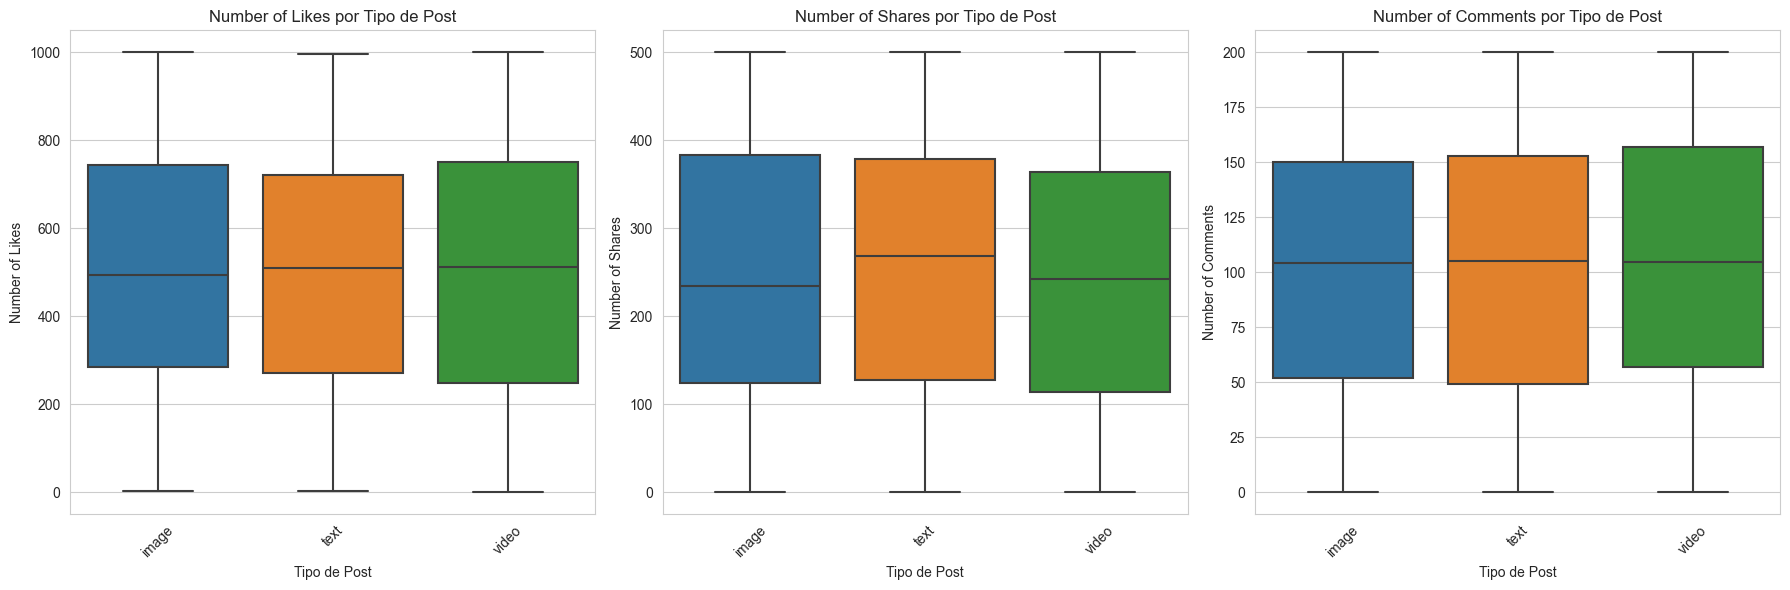

In [5]:
df["Post Type"] = df["Post Type"].astype("category")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x="Post Type", y=metric, ax=axes[i])
    axes[i].set_title(f"{metric} por Tipo de Post")
    axes[i].set_xlabel("Tipo de Post")
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig("../graphics/post_types.png")
plt.show()

Se puede observar En la primera gráfica por la izquierda: la gráfica de likes por publicación que los contenidos de tipo vídeo (verde) generan mayor número de likes, seguidos de las imágenes (azul).

En el caso de los shares, estarían igualadas las imágenes (azul) y el texto (naranja), y los vídeos (verde) serían los que menos shares generan.

Y en el caso de los comentarios, las publicaciones con contenido de tipo vídeo (verde) tienen una ligera diferencia por encima de los textos (naranja) y las imágenes (azul), aunque no son diferencias muy grandes. 

Se puede decir que en general las diferencias no son muy grandes en el engagement entre los distintos tipos de contenidos, aunque los de tipo vídeo suelen generar más likes y más comentarios, mientras que en cuanto a shares, serían las imágenes las que más engagement generan.

# Impacto del número de seguidores en el Engagement

Podemos ver si los usuarios con más seguidores generan más engagement.

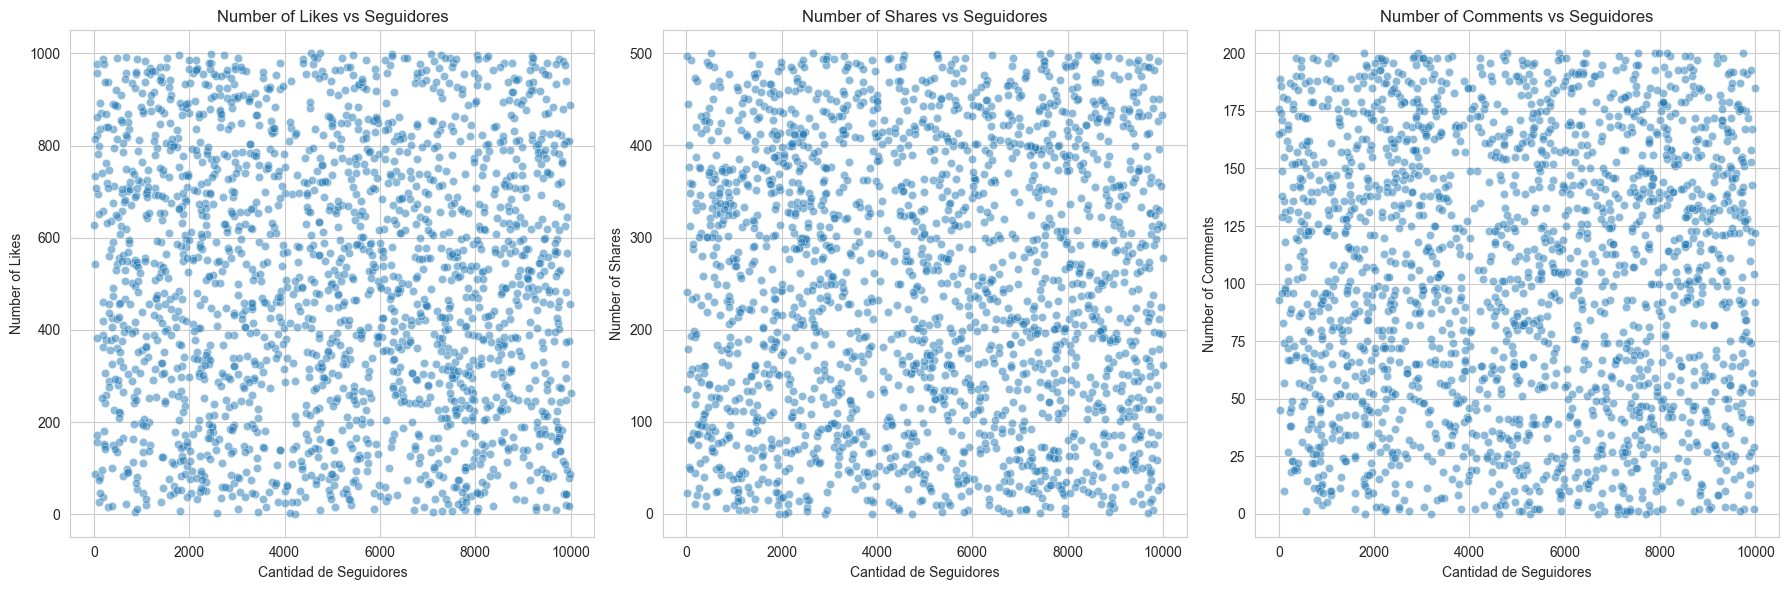

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, metric in enumerate(metrics):
    sns.scatterplot(data=df, x="User Follower Count", y=metric, ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{metric} vs Seguidores")
    axes[i].set_xlabel("Cantidad de Seguidores")
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.savefig("../graphics/user_followers.png")
plt.show()

En general la tendencia de los puntos es bastante dispersa y no hay un patrón claro. Esta dispersión indica que la cantidad de seguidores no garantiza mayor engagement.

# Analisis temporal del engagement

Podemos ver si hay patrones en las interacciones según la hora y el día de publicación.

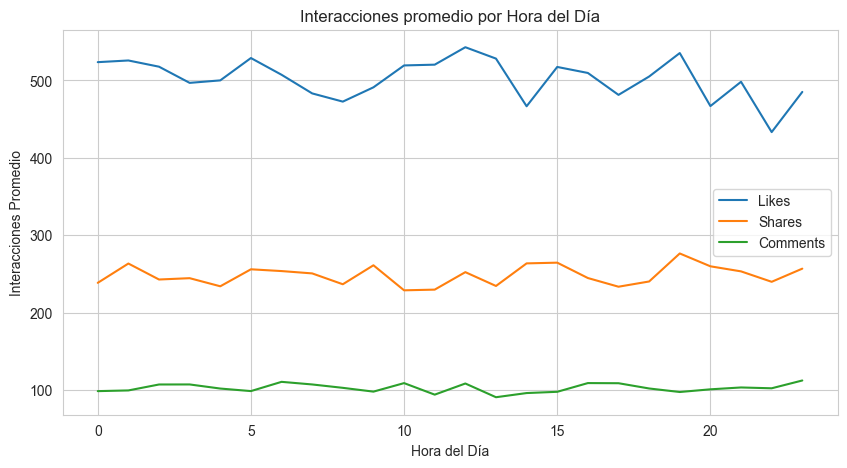

In [7]:
df["Post Date and Time"] = pd.to_datetime(df["Post Date and Time"])


df["Hour"] = df["Post Date and Time"].dt.hour
df["DayOfWeek"] = df["Post Date and Time"].dt.day_name()

df_hourly = df.groupby("Hour")[["Number of Likes", "Number of Shares", "Number of Comments"]].mean().reset_index()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hourly, x="Hour", y="Number of Likes", label="Likes")
sns.lineplot(data=df_hourly, x="Hour", y="Number of Shares", label="Shares")
sns.lineplot(data=df_hourly, x="Hour", y="Number of Comments", label="Comments")

plt.title("Interacciones promedio por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Interacciones Promedio")
plt.legend()
plt.savefig("../graphics/temporal_engagement.png")
plt.show()

Las horas con picos altos como el medio día o media tarde indica los mejores momentos para publicar, ya que acumulan mayor número de llikes y shares. 
Existe mayor diferencia entre las horas del día en los likes o los shares que en los comentarios, que tiene valores más similares a lo largo del día. 
En concreto, existe baja actividad de likes y shares en las horas de almorzar como puede ser hacia las 14:00, con una subida hacia las 15:00, que vuelve a bajar hasta la finalización de las jornadas laborables que podría ser alrededor de las 19:00. 

Publicar en las horas con más interacciones podría aumentar la visibilidad de los posts, y en los horarios con menos interacciones podría ser mejor evitar publicaciones. 

## Heatmap de engagement por día y hora

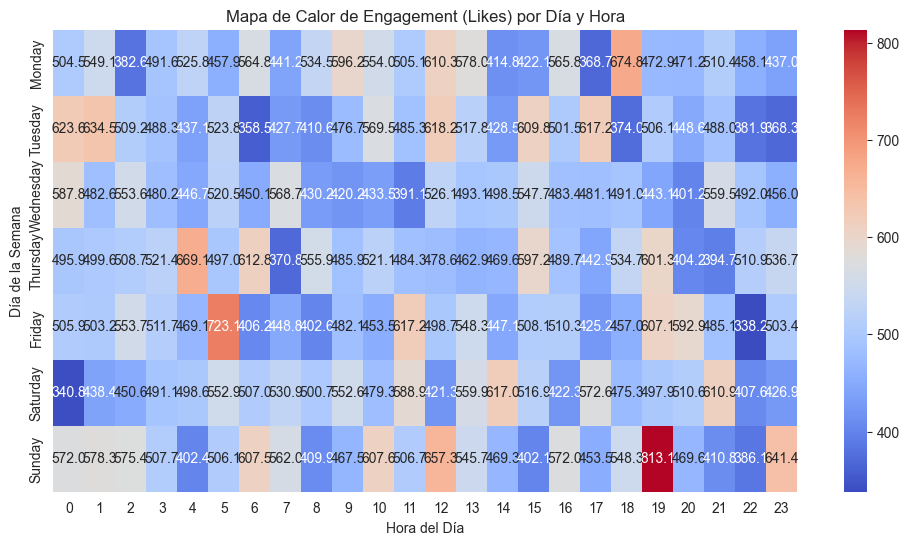

In [8]:
pivot_table = df.pivot_table(values="Number of Likes", index="DayOfWeek", columns="Hour", aggfunc="mean")

orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pivot_table = pivot_table.reindex(orden_dias)

# Crear heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".1f")

plt.title("Mapa de Calor de Engagement (Likes) por Día y Hora")
plt.xlabel("Hora del Día")
plt.ylabel("Día de la Semana")
plt.savefig("../graphics/heatmap_days_of_week.png")
plt.show()

Se puede observar una zona con un color visiblemente más intenso, es decir, con mayor engagement, a las 19:00 del domingo. También hay otros picos de intensidad, aunque menores, también el domingo a medio día, los viernes hacia las 5 de la mañana y los lunes a las 18:00 de la tarde. 

Estas diferencias entre las horas y los días significa que el engagement puede variar dependiendo del día y la hora. 